# Final Project: Part 2

### Name: Qianwen Chen, Alice Bhopalwala, Chenghu, Shreya Udhani

<ul>
    <li>
        <a href="#loadingdata">1 Loading data</a>
    </li>
    <li>
        <a href="#dataanalysis">2 Data Analysis</a>
        <ul>
            <li>
                <a href="#types">2.1 Types</a>
            </li>
            <li>
                <a href="#stats">2.2 Stats</a>
            </li>
        </ul>
    </li>
    <li>
        <a href="#summary">3 Summary</a>
    </li>
</ul>

<a id="loadingdata"></a>
## 1 Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 50})
import seaborn as sns

In [2]:
pokemon_data = pd.read_csv('Pokemon.csv')
pokemon_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [12]:
pokemon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [10]:
pokemon_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


We see that there are duplicate numbers in the # column. Those rows correspond to Mega Evolutions or different versions of the same Pokémon.

<a id="dataanalysis"></a>
## 2 Data Analysis

<a id="types"></a>
### 2.1 Types

First let's see the different types of Pokémon.

In [62]:
# Primary types
types1 = np.sort(pokemon_data['Type 1'].unique())
types1

array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'], dtype=object)

In [63]:
# secondary types
types2 = np.sort(pokemon_data['Type 2'].unique())
types2

array(['', 'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting',
       'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal',
       'Poison', 'Psychic', 'Rock', 'Steel', 'Water'], dtype=object)

Notice that we have one more level in the secondary types. This is because a Pokémon may have either one or two types. For the Pokémon with only one type we have the empty level in the Type 2 column.

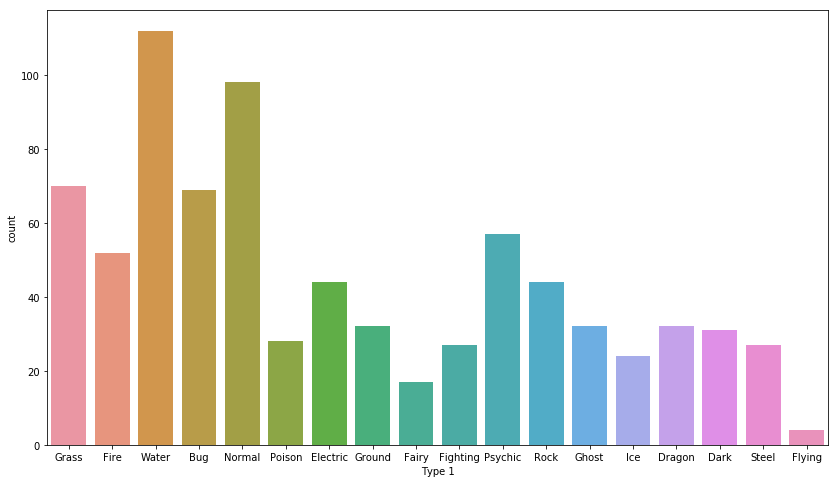

In [19]:
plt.figure(figsize=(14,8))
sns.countplot('Type 1',data=pokemon_data)
plt.show()

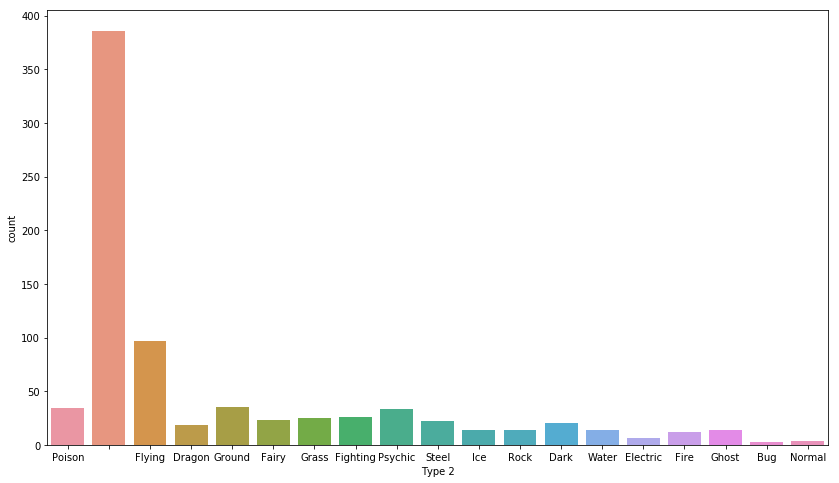

In [20]:
plt.figure(figsize=(14,8))
sns.countplot('Type 2',data=pokemon_data)
plt.show()

As we see, most Pokémon have only one type. We can calculate the number of Pokémon for each type combination. We can create a contingency table containing the counts of each combination of the levels of the variables involved (Type 1 and Type 2).

In [64]:
types = pokemon_data.groupby(['Type 1', 'Type 2']).size()

In [93]:
type_mat = np.zeros((len(types2), len(types1))).astype(int)
for i in range(len(types2)):
    for j in range(len(types1)):
        if types2[::-1][i] in types[types1[j]].index:
            type_mat[i, j] = types[types1[j], types2[::-1][i]]

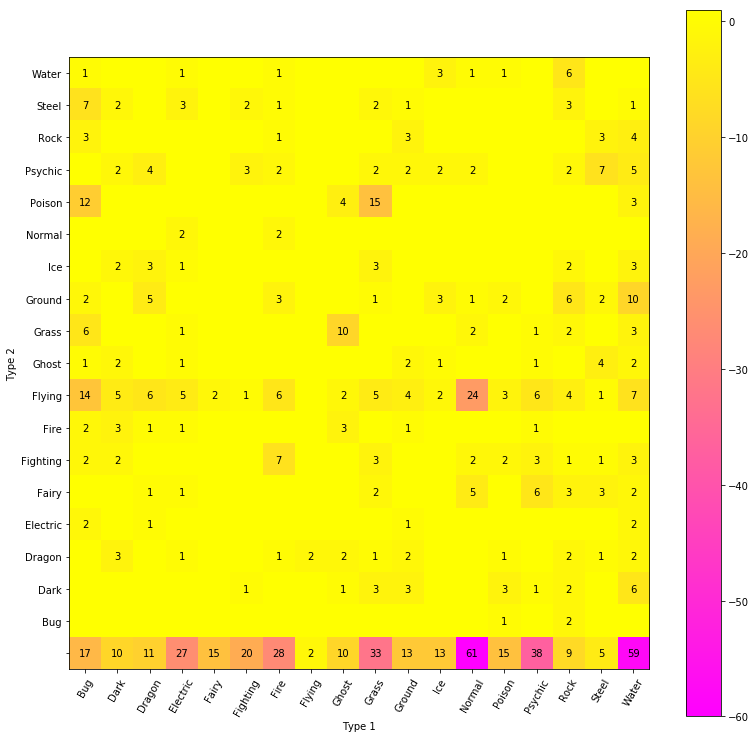

In [94]:
plt.figure(figsize=(13, 13))
#plt.matshow(type_mat, cmap=plt.cm.Reds)
plt.imshow(1 - type_mat, cmap="spring")
for i in np.arange(len(types1)):
    for j in np.arange(len(types2)):
        c = type_mat[j,i]
        if c != 0:
            plt.text(i, j, str(c), va='center', ha='center')
plt.xticks(np.arange(len(types1)), types1, rotation = 60)
plt.yticks(np.arange(len(types2)), types2[::-1])
plt.xlabel("Type 1")
plt.ylabel("Type 2")
plt.colorbar()
plt.show()

The last row correspond to Pokémon with one type. For example, there are 27 pure Electric-type Pokémon.

<a id="stats"></a>
### 2.2 Stats

We can start with the histograms to represent the distribution of the following stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. And also plot the correlations as well.

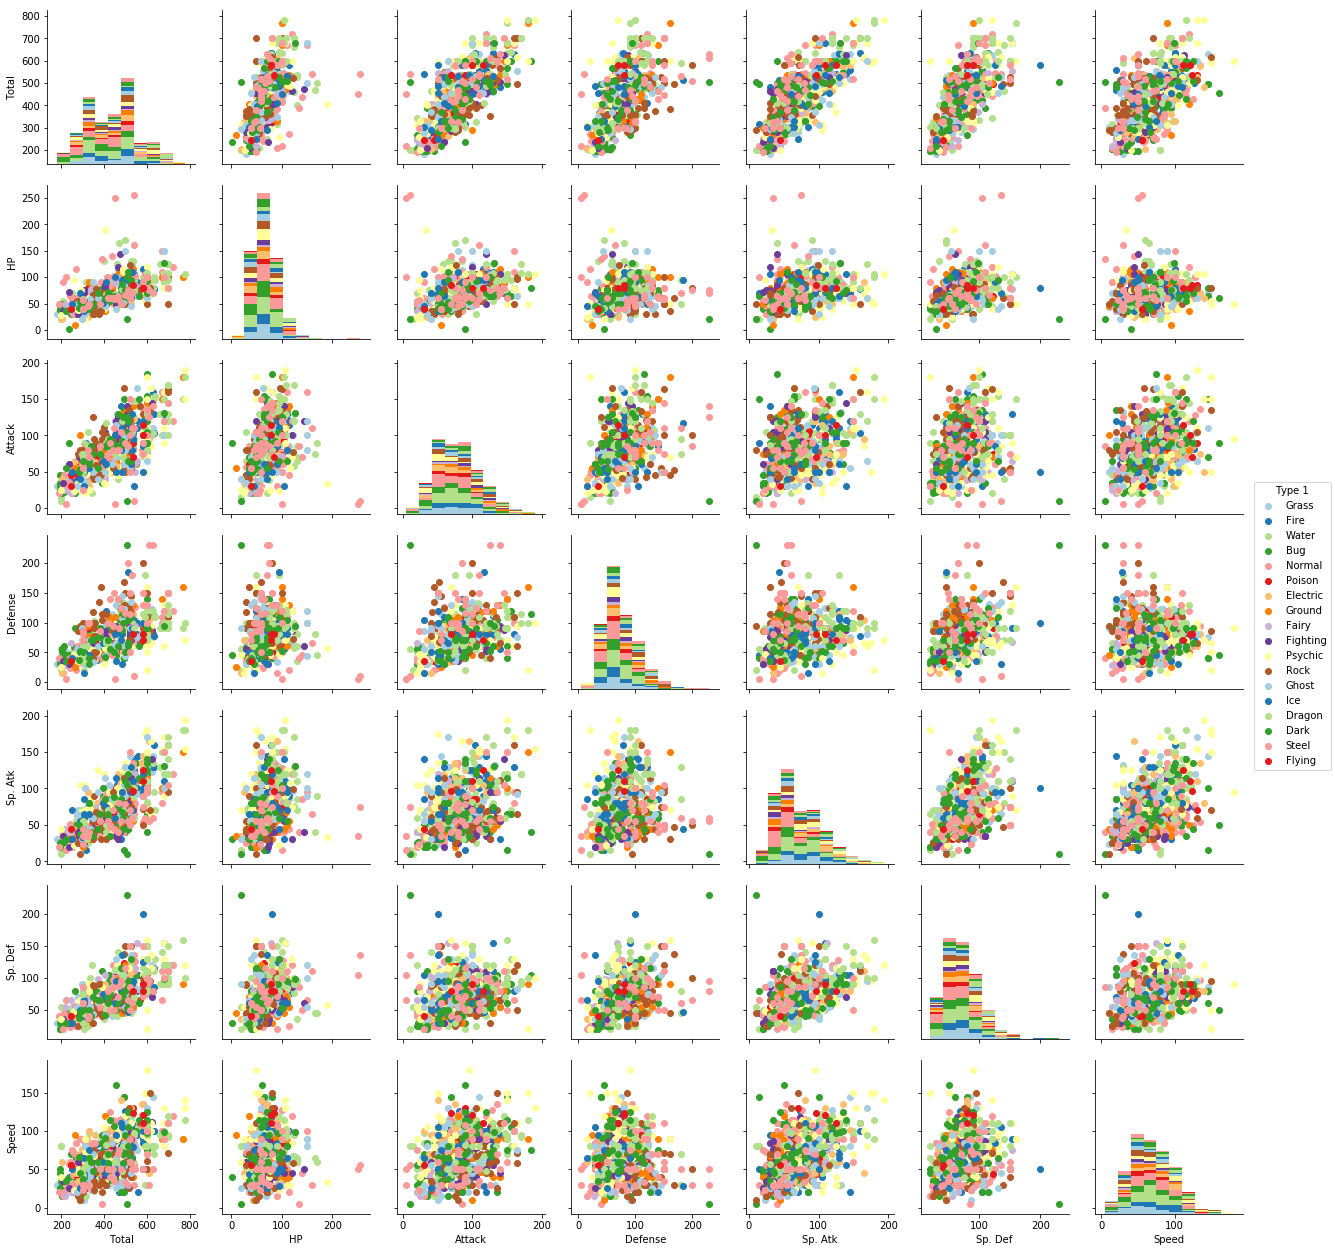

In [101]:
pokemon_data_cols = pokemon_data[['Type 1','Total', 'HP','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

with sns.color_palette('Paired', 18):
    g=sns.PairGrid(pokemon_data_cols,hue='Type 1')
    g = g.map_offdiag(plt.scatter)
    g = g.map_diag(plt.hist)
    g.add_legend()

We can also check if the Legendary Pokémon are much better than the normal ones by comparing the density plots to see the difference between their stats.

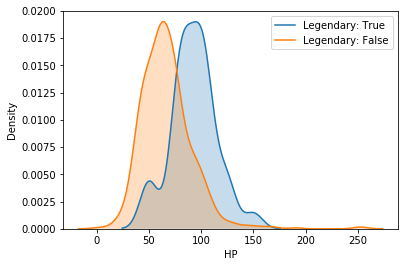

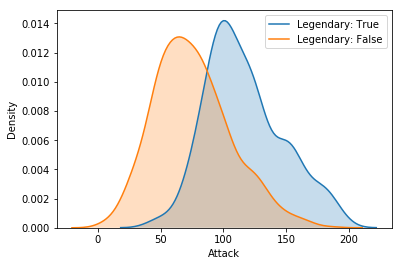

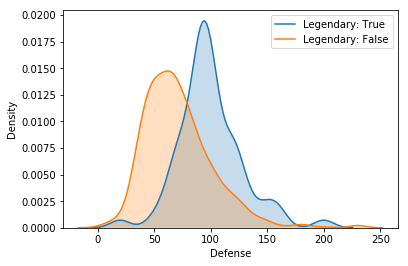

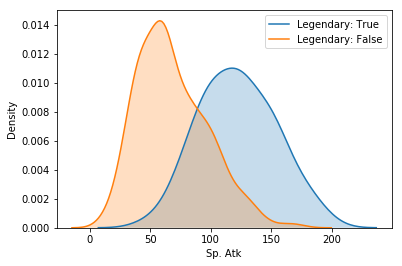

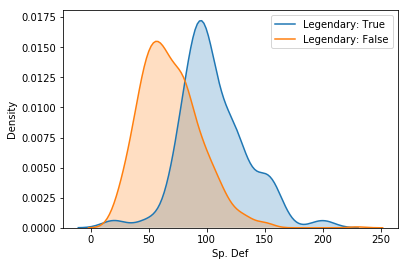

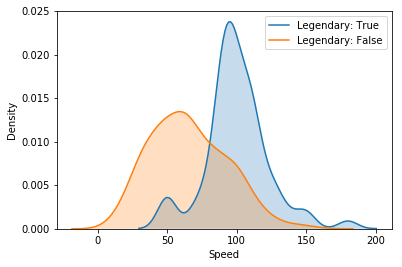

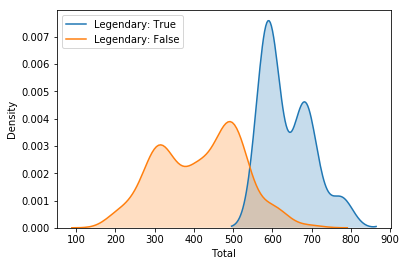

In [131]:
stat_cols = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Total"]
for name in stat_cols:
    plt.figure()
    sns.kdeplot(pokemon_data[pokemon_data['Legendary'] == True][name], shade=True, label = "Legendary: True")
    sns.kdeplot(pokemon_data[pokemon_data['Legendary'] == False][name], shade=True, label = "Legendary: False")
    plt.xlabel(name)
    plt.ylabel("Density")
    plt.show()

It is clear that Legendary Pokémon have greater statistics. We can then use boxplots to see the statistical distribution according to the Pokémon’s type.

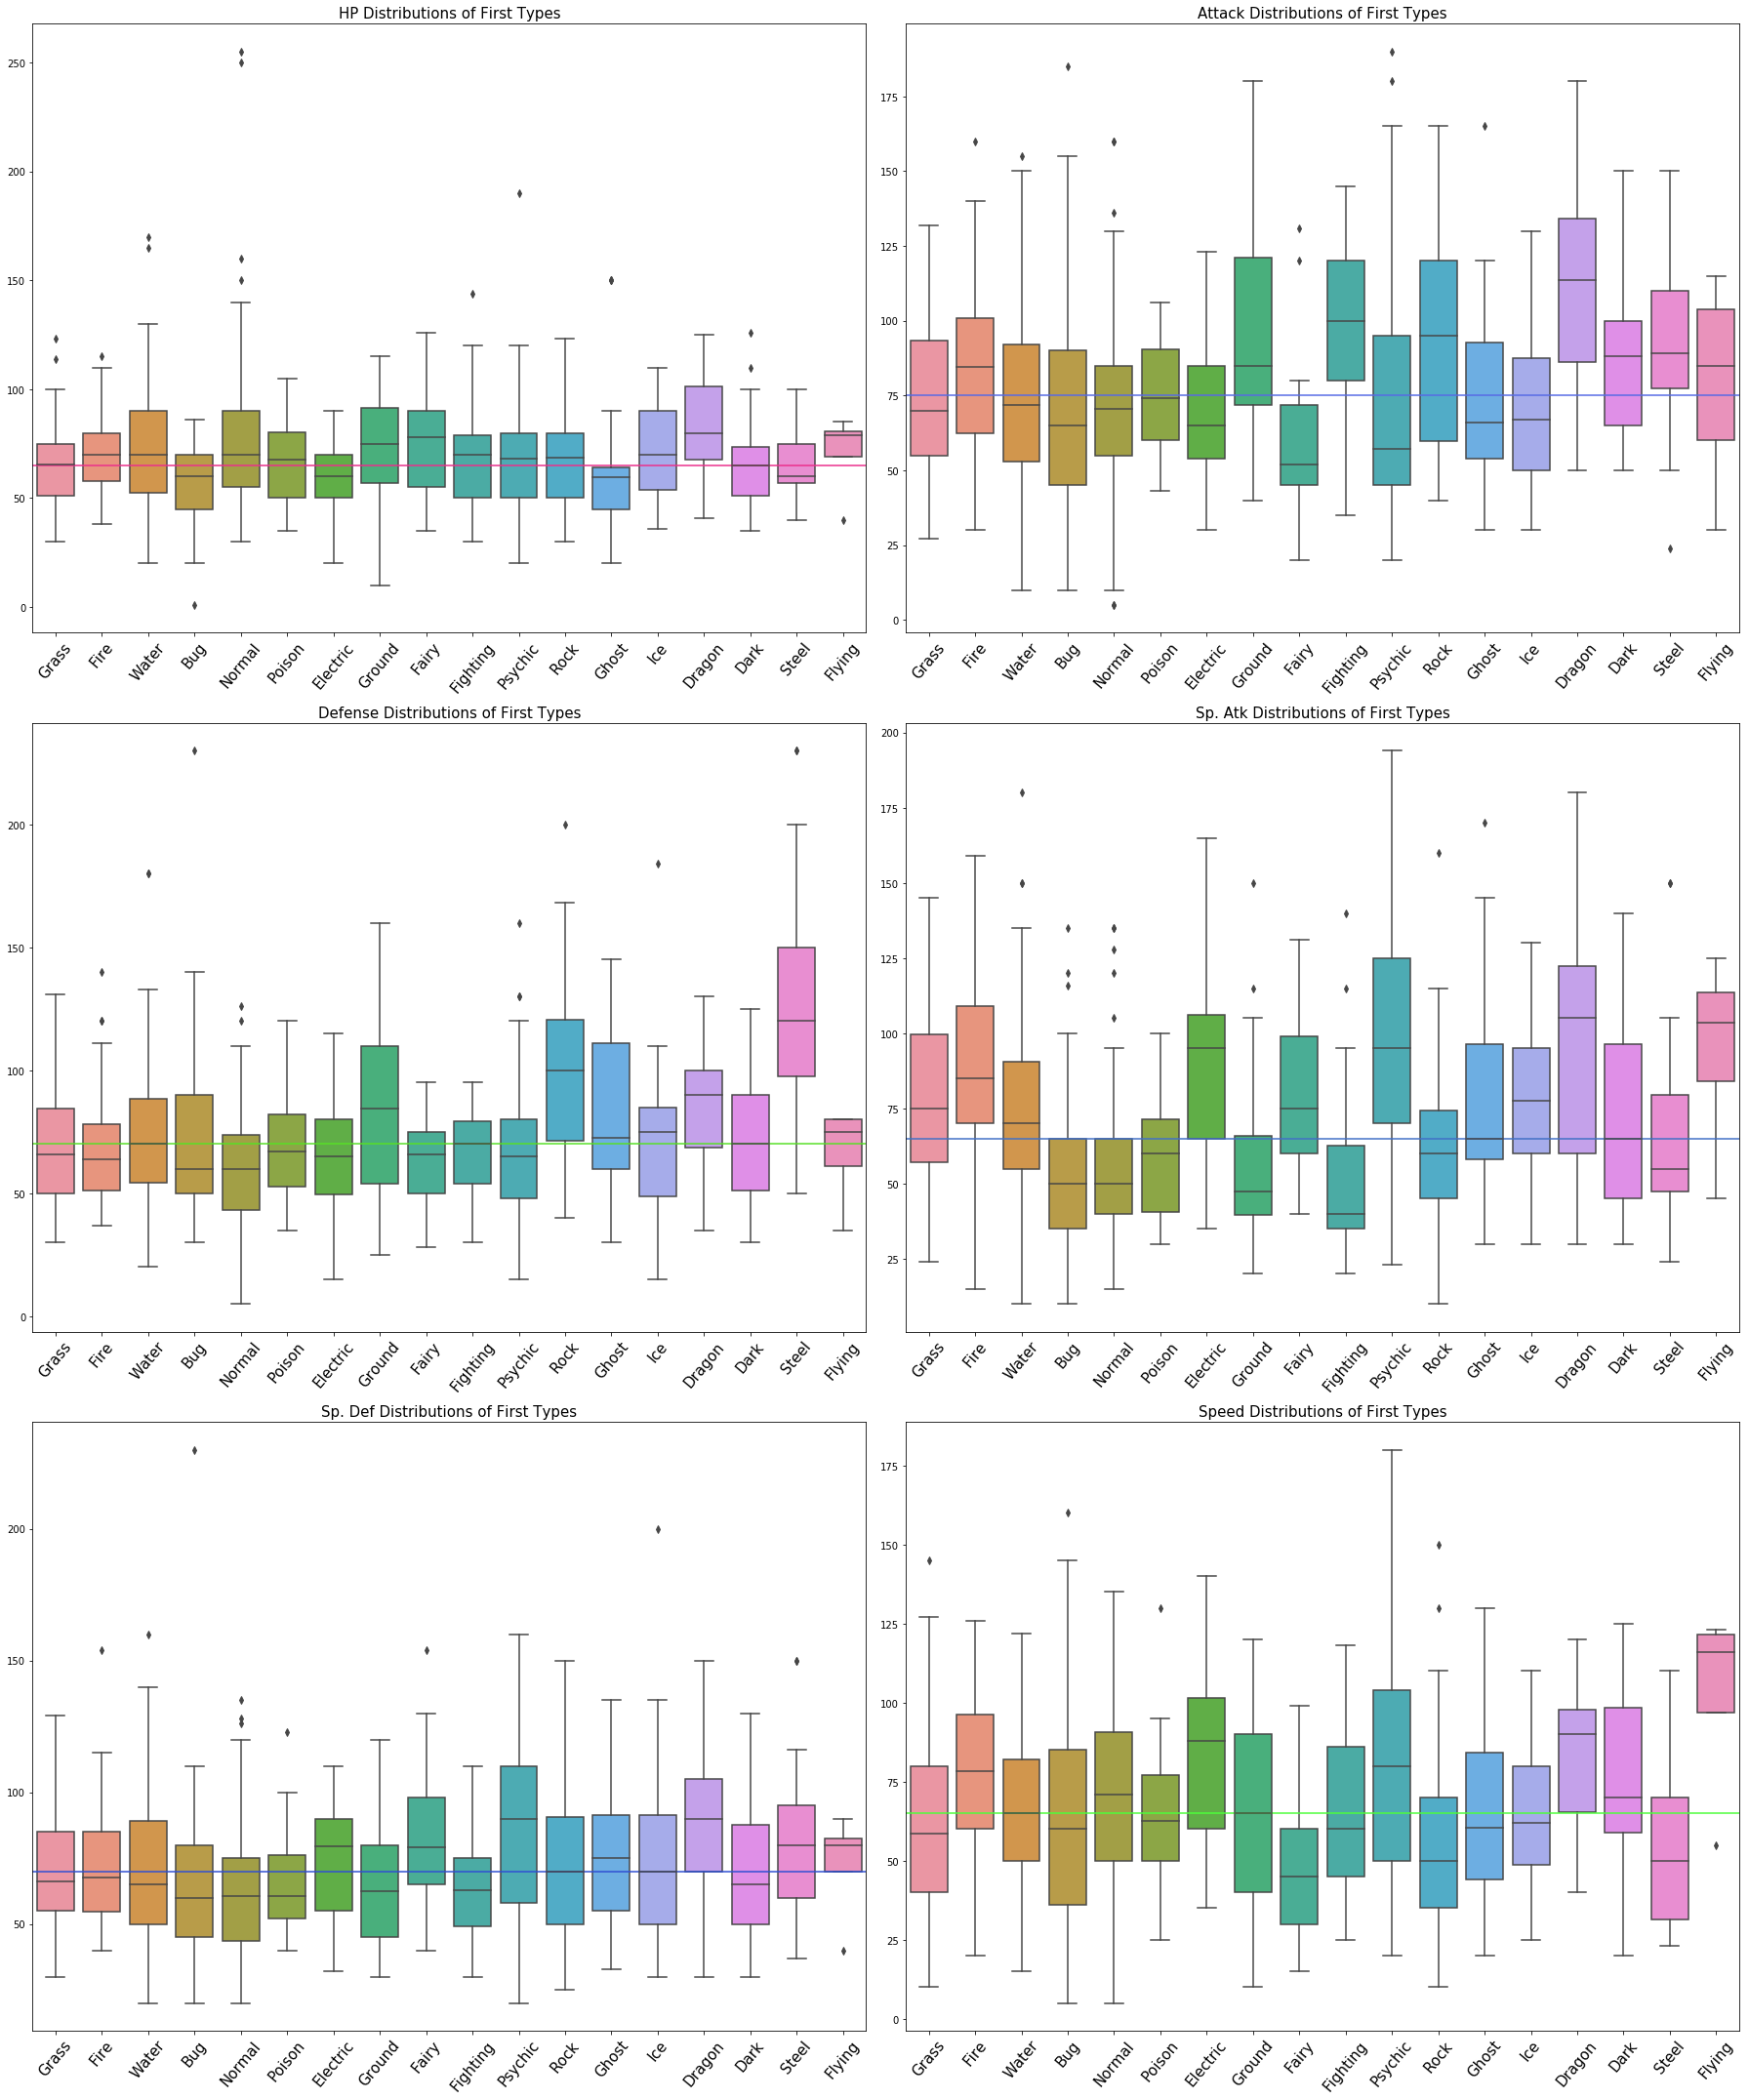

In [129]:
stats = pokemon_data.columns[5:11]

plt.figure(figsize=(25,30))

for ii, stat in enumerate(stats):
    title = "{stat} Distributions of First Types".format(
        stat = stat
    )
    plt.subplot(3, 2, ii+1)
    plt.title(title, fontsize=15)
    plt.xticks(rotation=50, fontsize=15)
    sns.boxplot(x='Type 1', y=stat, data = pokemon_data)
    plt.axhline(pokemon_data[stat].median(), color=np.random.rand(3))
    plt.xlabel("")
    plt.ylabel("")
    
plt.tight_layout()
plt.show()

The outliers in the boxplots correspond to Pokémon (normally Legendary or Mega Evolutions) with impressive stats numerically distants from the rest of the data. For example, Rock is an outlier in the defense boxplot (200 points in defense!).

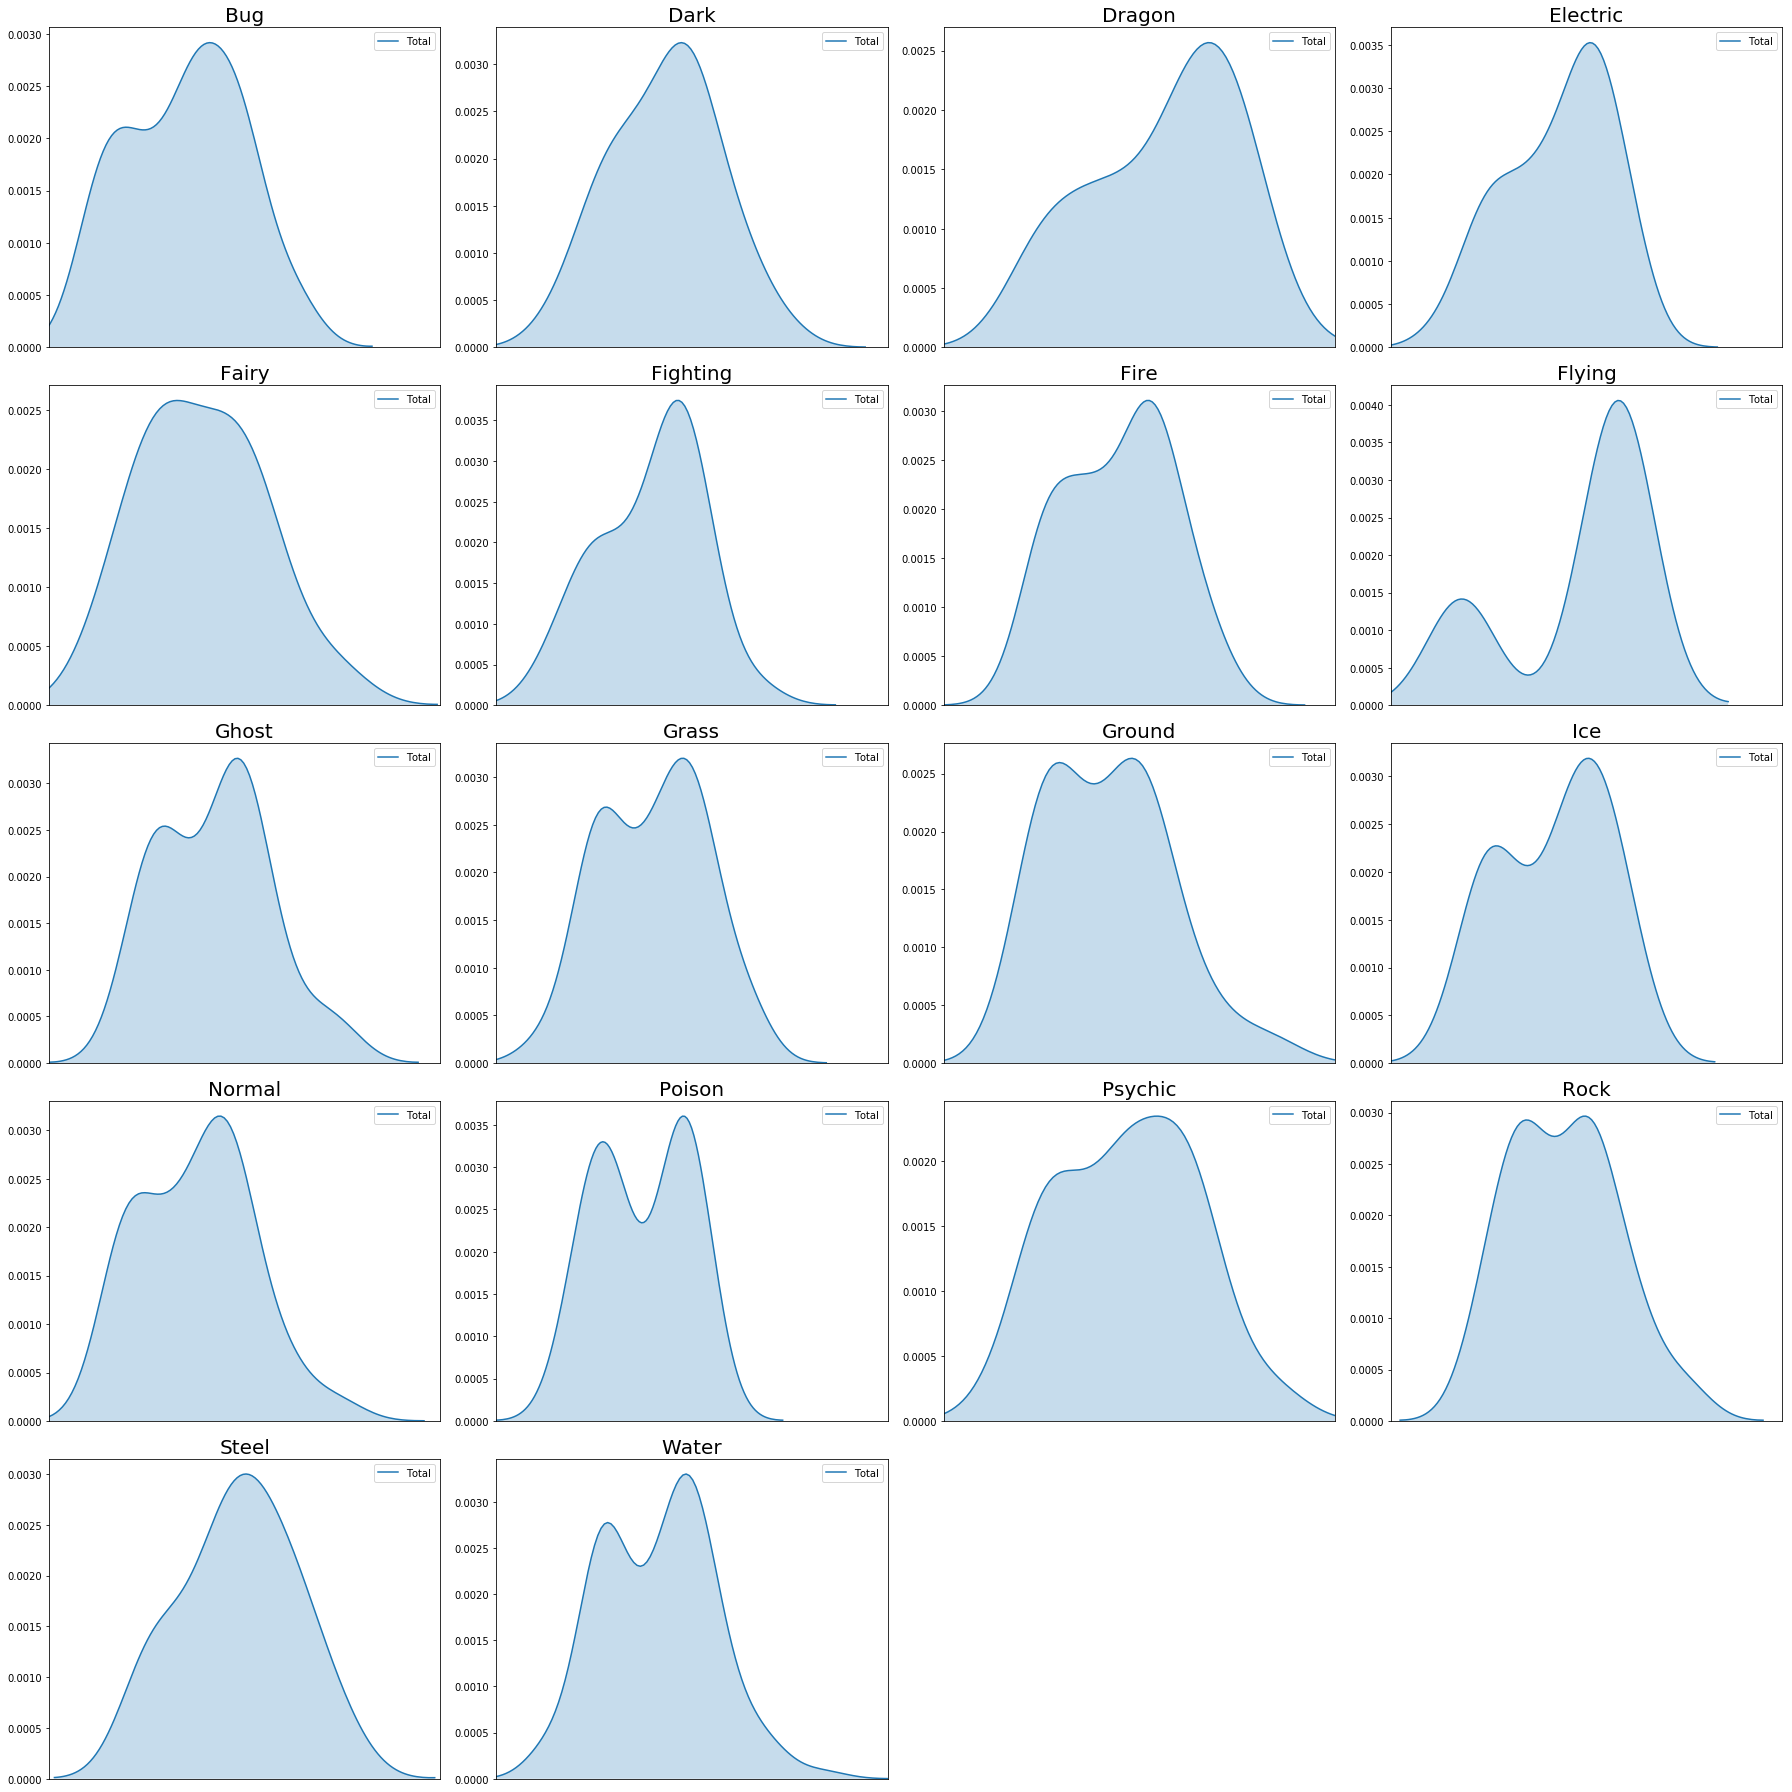

In [146]:
plt.figure(figsize=(25,25))
ii = 1
for t in types1:
    plt.subplot(5, 4, ii)
    ii = ii + 1
    sns.kdeplot(pokemon_data[pokemon_data['Type 1'] == t]["Total"], shade=True)
    plt.tick_params(axis='x', which='both', bottom='off', labelbottom='off')
    plt.xlim([100, 900])
    plt.title(t, fontsize=20)
plt.tight_layout()
    

By analyzing the boxplots and the density plots, we can say that the Dragon-type Pokémon are statistically superior from the rest.

<a id="summary"></a>
## 3 Summary

We used different visualization approach to analyze the property of this Pokemon dataset. We have a solid understanding of the distribution of the attributes. We have studied the distribution of types (both Type 1 and Type 2), the stats for each type and for each legendary. We are good to go forward.